In [1]:
import pickle
import numpy as np
import os
from torchvision.datasets import VisionDataset, CIFAR100
import numpy as np
import random
from collections import ChainMap


np.random.seed(1993) 
order = np.arange(100)
np.random.shuffle(order)
print(order)
label_map = {k: v for v, k in enumerate(order)}



print(label_map)




train = CIFAR100('.data/', train=True, transform=None, download=True)
test = CIFAR100('.data/', train=False, transform=None, download=True)

class Cifar100:
    def __init__(self, train, test):
        self.train = train
        self.test = test
        self.train_groups, self.test_groups = self.split()
        self.batch_num = 10

    def split(self):
        train_groups = [[],[],[],[],[],[],[],[],[],[]]
        for data, target in self.train:
            if target in order[:10]:
                train_groups[0].append((data,target))
            elif target in order[10:20]:
                train_groups[1].append((data,target))
            elif target in order[20:30]:
                train_groups[2].append((data,target))
            elif target in order[30:40]:
                train_groups[3].append((data,target))
            elif target in order[40:50]:
                train_groups[4].append((data,target))
            elif target in order[50:60]:
                train_groups[5].append((data,target))
            elif target in order[60:70]:
                train_groups[6].append((data,target))
            elif target in order[70:80]:
                train_groups[7].append((data,target))
            elif target in order[80:90]:
                train_groups[8].append((data,target))
            elif target in order[90:100]:
                train_groups[9].append((data,target))
        assert len(train_groups[0]) == 5000, len(train_groups[0])
        assert len(train_groups[1]) == 5000, len(train_groups[1])
        assert len(train_groups[2]) == 5000, len(train_groups[2])
        assert len(train_groups[3]) == 5000, len(train_groups[3])
        assert len(train_groups[4]) == 5000, len(train_groups[4])
        assert len(train_groups[5]) == 5000, len(train_groups[5])
        assert len(train_groups[6]) == 5000, len(train_groups[6])
        assert len(train_groups[7]) == 5000, len(train_groups[7])
        assert len(train_groups[8]) == 5000, len(train_groups[8])
        assert len(train_groups[9]) == 5000, len(train_groups[9])



        test_groups = [[],[],[],[],[],[],[],[],[],[]]
        for data, target in self.test:
            if target in order[:10]:
                test_groups[0].append((data,target))
            elif target in order[10:20]:
                test_groups[1].append((data,target))
            elif target in order[20:30]:
                test_groups[2].append((data,target))
            elif target in order[30:40]:
                test_groups[3].append((data,target))
            elif target in order[40:50]:
                test_groups[4].append((data,target))
            elif target in order[50:60]:
                test_groups[5].append((data,target))
            elif target in order[60:70]:
                test_groups[6].append((data,target))
            elif target in order[70:80]:
                test_groups[7].append((data,target))
            elif target in order[80:90]:
                test_groups[8].append((data,target))
            elif target in order[90:100]:
                test_groups[9].append((data,target))
        assert len(test_groups[0]) == 1000
        assert len(test_groups[1]) == 1000
        assert len(test_groups[2]) == 1000
        assert len(test_groups[3]) == 1000
        assert len(test_groups[4]) == 1000
        assert len(test_groups[5]) == 1000
        assert len(test_groups[6]) == 1000
        assert len(test_groups[7]) == 1000
        assert len(test_groups[8]) == 1000
        assert len(test_groups[9]) == 1000

        return train_groups, test_groups

    def next_classes_batch(self, i):
        return self.train_groups[i], self.test_groups[i]

if __name__ == "__main__":
    cifar = Cifar100(train, test)
    print(len(cifar.train_groups[0]))

[68 56 78  8 23 84 90 65 74 76 40 89  3 92 55  9 26 80 43 38 58 70 77  1
 85 19 17 50 28 53 13 81 45 82  6 59 83 16 15 44 91 41 72 60 79 52 20 10
 31 54 37 95 14 71 96 98 97  2 64 66 42 22 35 86 24 34 87 21 99  0 88 27
 18 94 11 12 47 25 30 46 62 69 36 61  7 63 75  5 32  4 51 48 73 93 39 67
 29 49 57 33]
{68: 0, 56: 1, 78: 2, 8: 3, 23: 4, 84: 5, 90: 6, 65: 7, 74: 8, 76: 9, 40: 10, 89: 11, 3: 12, 92: 13, 55: 14, 9: 15, 26: 16, 80: 17, 43: 18, 38: 19, 58: 20, 70: 21, 77: 22, 1: 23, 85: 24, 19: 25, 17: 26, 50: 27, 28: 28, 53: 29, 13: 30, 81: 31, 45: 32, 82: 33, 6: 34, 59: 35, 83: 36, 16: 37, 15: 38, 44: 39, 91: 40, 41: 41, 72: 42, 60: 43, 79: 44, 52: 45, 20: 46, 10: 47, 31: 48, 54: 49, 37: 50, 95: 51, 14: 52, 71: 53, 96: 54, 98: 55, 97: 56, 2: 57, 64: 58, 66: 59, 42: 60, 22: 61, 35: 62, 86: 63, 24: 64, 34: 65, 87: 66, 21: 67, 99: 68, 0: 69, 88: 70, 27: 71, 18: 72, 94: 73, 11: 74, 12: 75, 47: 76, 25: 77, 30: 78, 46: 79, 62: 80, 69: 81, 36: 82, 61: 83, 7: 84, 63: 85, 75: 86, 5: 87, 32: 88, 

In [2]:
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset
import skimage.io as io
import glob
import numpy as np
import random
import torch


class BatchData(Dataset):
    def __init__(self, images, labels, input_transform=None):
        self.images = images
        self.labels = labels
        self.input_transform = input_transform

    def __getitem__(self, index):
        image = self.images[index]
        image = Image.fromarray(np.uint8(image))
        label = self.labels[index]
        label = label_map[label]
        if self.input_transform is not None:
          image = self.input_transform(image)
        
        label = torch.LongTensor([label])
        return image, label

    def __len__(self):
        return len(self.images)

In [3]:
class Exemplar:
    def __init__(self, max_size, total_cls):    # serve total_cls?
        self.train = {}
        self.cur_cls = 0
        self.max_size = max_size
        self.total_classes = total_cls
        self.store_num = {}
        self.count_train = {}

    def update(self, cls_num, train, inc_i):
        train_x, train_y = train
        cur_keys = list(set(train_y))
        print(cur_keys)
        def countX(tup, x): 
            count = 0
            for ele in tup: 
              if (ele == x): 
                count = count + 1
            return count 
        
        self.cur_cls = cls_num

        for i in order[inc_i*10: 10*(inc_i+1)]:      # cambia range ad ogni step
            self.count_train[i] = countX(train_y, i)     
            self.store_num[i] = int(self.count_train[i] / ((self.cur_cls)*0.1))
            # print(i, self.store_num[i])    # to balance val new and val old


        #assert self.cur_cls == len(list(self.train.keys()))

        
        total_store_num = self.max_size / self.cur_cls #if self.cur_cls != 0 else max_size
        train_store_num = int(total_store_num)  # ha senso?

        for x, y in zip(train_x, train_y):
            if y not in self.train:
                self.train[y] = [x]
            else:
                #if len(self.train[y]) < self.store_num[y]:
                if len(self.train[y]) < train_store_num:
                    self.train[y].append(x)
        assert self.cur_cls == len(list(self.train.keys()))
        
        for key, value in self.train.items():
            #self.store_num[key] = int(self.count_train[key] / ((self.cur_cls)*0.1))
            #self.train[key] = value[:self.store_num[key]]
            self.train[key] = value[:train_store_num]
        for key, value in self.train.items():
            #assert len(self.train[key]) == self.store_num[key]
            assert len(self.train[key]) == train_store_num      # ==!


    def get_exemplar_train(self):
        exemplar_train_x = []
        exemplar_train_y = []
        for key, value in self.train.items():
            for train_x in value:
                exemplar_train_x.append(train_x)
                exemplar_train_y.append(key)
        return exemplar_train_x, exemplar_train_y

In [4]:
import os
import os.path
import torchvision
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data.dataloader import default_collate

In [5]:
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo

"""
Credits to @hshustc
Taken from https://github.com/hshustc/CVPR19_Incremental_Learning/tree/master/cifar100-class-incremental
"""


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, planes * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes):
        self.old_model = None
        self.num_classes = num_classes
        self.inplanes = 16
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self._make_layer(block, 16, layers[0])
        self.layer2 = self._make_layer(block, 32, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2)
        self.avgpool = nn.AvgPool2d(8, stride=1)
        self.fc = nn.Linear(64 * block.expansion, self.num_classes)
  

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x, features=False):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        
        if features:
            x = x / x.norm()
        else:
            x = self.fc(x)

        return x
        
def resnet20(pretrained=False, **kwargs):
    n = 3
    model = ResNet(BasicBlock, [n, n, n], **kwargs)
    return model

def resnet32(pretrained=False, **kwargs):
    n = 5
    model = ResNet(BasicBlock, [n, n, n], **kwargs)
    return model

def resnet56(pretrained=False, **kwargs):
    n = 9
    model = ResNet(Bottleneck, [n, n, n], **kwargs)
    return model

In [6]:
from __future__ import print_function, absolute_import
import numpy as np
from six.moves import xrange
from sklearn.utils.validation import check_X_y
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import KMeans

In [7]:
from torch.autograd import Variable


def variable(t: torch.Tensor, use_cuda=True, **kwargs):
    if torch.cuda.is_available() and use_cuda:
        t = t.cuda()
    return Variable(t, **kwargs)

class EWC(object):
    def __init__(self, model, dataset, inc_i):

        self.model = model
        self.dataset = dataset
        self.inc_i = inc_i
        self.params = {n: p for n, p in self.model.named_parameters() if p.requires_grad}
        self._means = {}
        self._precision_matrices = self._diag_fisher()

        for n, p in deepcopy(self.params).items():
            self._means[n] = variable(p.data)

    def _diag_fisher(self):
        precision_matrices = {}
        for n, p in deepcopy(self.params).items():
            p.data.zero_()
            precision_matrices[n] = variable(p.data)

        self.model.eval()
        for _, (image, _) in enumerate((self.dataset)):
            self.model.zero_grad()
            image = variable(image)
            output = self.model(image).view(1, -1)
            label = output.max(1)[1].view(-1)
            loss = F.nll_loss(F.log_softmax(output, dim=1), label)
            loss.backward()

            for n, p in self.model.named_parameters():
                precision_matrices[n].data += p.grad.data ** 2 / (5000*(self.inc_i))

        precision_matrices = {n: p for n, p in precision_matrices.items()}
        return precision_matrices

    def penalty(self, model):
        loss = 0
        for n, p in model.named_parameters():
            _loss = self._precision_matrices[n] * (p - self._means[n]) ** 2
            loss += _loss.sum()
        return loss

In [8]:
import torch
import torchvision
from torchvision.models import vgg16
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.transforms import Compose, CenterCrop, Normalize, Scale, Resize, ToTensor, ToPILImage
from torch.optim.lr_scheduler import LambdaLR, StepLR, MultiStepLR
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss    
from sklearn.svm import NuSVC, SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils.validation import _num_samples, check_array
import warnings
warnings.filterwarnings('ignore') 

import numpy as np
import glob
import PIL.Image as Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import json
import pickle
from copy import deepcopy
# import dml
# from dml.ncmc import NCMC_Classifier


class Trainer:
    def __init__(self, total_cls):
        self.total_cls = total_cls
        self.seen_cls = 0
        self.dataset = Cifar100(train, test)
        self.model = resnet32(num_classes = total_cls).cuda()
        self.count_label = {}
        samples_per_cls = [[0] * 100, [0] * 100, [0] * 100, [0] * 100, [0] * 100, [0] * 100, [0] * 100, [0] * 100, [0] * 100, [0] * 100]
        for inc_i in range(10):
            assert len(samples_per_cls[inc_i]) == 100
            for j in range(10):
                samples_per_cls[inc_i][10*inc_i+j] = 500
            for i in range(inc_i*10):
                samples_per_cls[inc_i][i]=int(200/(inc_i))
        beta = 0.999
        effective_num = 1.0 - np.power(beta, samples_per_cls)
        weights = (1.0 - beta) / np.array(effective_num)
        # weights = weights / np.sum(weights) * 100
        self.weights = torch.Tensor(weights).cuda()
        self.means = {}
        transform_train = [
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
        ]
        transform_train.extend([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465),
                                 (0.2023, 0.1994, 0.2010)),
        ])
        self.input_transform = Compose(transform_train)
        
        self.input_transform_eval = Compose([
                                ToTensor(),
                                Normalize((0.4914, 0.4822, 0.4465),
                                 (0.2023, 0.1994, 0.2010))])
        total_params = sum(p.numel() for p in self.model.parameters() if p.requires_grad)
        print("Solver total trainable parameters : ", total_params)


    def test(self, testdata):
        # print("test data number : ",len(testdata))
        self.model.eval()
        count = 0
        correct = 0
        wrong = 0
        with torch.no_grad():
          for i, (image, label) in enumerate(testdata):
              image = image.cuda()
              label = label.view(-1).cuda()
              p = self.model(image)
              pred = p[:,:self.seen_cls].argmax(dim=-1)
              correct += sum(pred == label).item()
              wrong += sum(pred != label).item()
        acc = correct / (wrong + correct)
        print(f"\r Test Acc: {acc*100} \n")
        return acc

    def NMEClassifier(self, test_dataloader, train_loader, display=True, suffix=''):
      self.model.eval()
      with torch.no_grad():
        for i in range(0,self.seen_cls):
          t=0
          mean = torch.zeros((1,64),device='cuda')
          for indices,(images,labels) in enumerate((train_loader)):
            images = images.to('cuda')
            outputs = self.model(images,features=True)
            for output,key in zip(outputs,labels):
              if i==key:
                mean+=output
                t+=1
          mean = mean/t
          self.means[i] = mean / mean.norm()
        running_corrects = 0
        for images,labels in test_dataloader:
            images = images.to('cuda')
            labels = labels.to('cuda')
            features = self.model(images,features=True)

            for i,sample in enumerate(features):
                dots = torch.tensor([torch.dot(torch.squeeze(mean), sample).data for _,mean in self.means.items()])
                y_pred = torch.argmax(dots).item()
                if y_pred == labels[i] : 
                    running_corrects+=1

        accuracy_eval = running_corrects / (100*self.seen_cls)

        if display :    
            print('Accuracy on eval NME'+str(suffix)+':', accuracy_eval)

        return accuracy_eval


    def get_lr(self, optimizer):
        for param_group in optimizer.param_groups:
            return param_group['lr']

    def train(self, batch_size, epoches, lr, max_size):
        total_cls = self.total_cls
        criterion = CrossEntropyLoss()
        # criterion = BCEWithLogitsLoss()

        previous_model = None
        exemplar = Exemplar(max_size, total_cls)
        dataset = self.dataset
        test_xs = []
        test_ys = []
        train_xs = []
        train_ys = []

        test_accs = []
        for inc_i in range(dataset.batch_num):
            print(50*'---')
            print(" Incremental batch num: " , inc_i)
            train, test = dataset.next_classes_batch(inc_i)
            print(len(train), len(test))
            train_x, train_y = zip(*train)
            test_x, test_y = zip(*test)
            test_xs.extend(test_x)
            test_ys.extend(test_y)
 

            if inc_i > 0:
               old_task = DataLoader(BatchData(train_xs, train_ys, input_transform=self.input_transform), batch_size=128, shuffle=True, drop_last=True)
               train_xs, train_ys = exemplar.get_exemplar_train()

            
            train_xs.extend(train_x)
            train_ys.extend(train_y)  

            def countX(tup, x): 
              count = 0
              for ele in tup: 
                if (ele == x): 
                  count = count + 1
              return count 
        

            for i in order[inc_i*10: 10*(inc_i+1)]:      # cambia range ad ogni step
              self.count_label[i] = countX(train_ys, i)     

            print(len(list(self.count_label.keys())))
              
            self.seen_cls = (total_cls//dataset.batch_num)*(inc_i + 1)
            print("Seen cls number: ", self.seen_cls)                            

            assert self.seen_cls == len(list(self.count_label.keys()))    

            train_data = DataLoader(BatchData(train_xs, train_ys, input_transform=self.input_transform),
                        batch_size=batch_size, shuffle=True, drop_last=True)
            test_data = DataLoader(BatchData(test_xs, test_ys, input_transform=self.input_transform_eval),
                        batch_size=batch_size, shuffle=False)

            optimizer = optim.SGD(self.model.parameters(), lr=0.1, momentum=0.9,  weight_decay=2e-4)
            # scheduler = LambdaLR(optimizer, lr_lambda=adjust_cifar100)
            # scheduler = StepLR(optimizer, step_size=40, gamma=0.1)
            scheduler = MultiStepLR(optimizer, milestones=[40, 60], gamma=0.2)


            test_acc = []
            

            for epoch in range(epoches):
                cur_lr = self.get_lr(optimizer)
                print(f"\r EPOCH:{epoch}, LR:{cur_lr}", end='')
                if inc_i > 0:
                   self.stage_ewc(train_data, old_task, criterion, optimizer, inc_i)
                   scheduler.step()
                else:
                   self.stage_1(train_data, criterion, optimizer)
                   scheduler.step()



            self.previous_model = deepcopy(self.model)
            if inc_i > 0:
              acc = self.NMEClassifier(test_data,train_data)
            else:
              acc = self.test(test_data)
            test_acc.append(acc)
            test_accs.append(max(test_acc))
            print(test_accs)
            
            x_ex, y_ex = self.exemplar_selection(train_x, train_y)   
            exemplar.update(self.seen_cls, (x_ex, y_ex), inc_i)


         
        fig, ax = plt.subplots()
        line1 = ax.plot(range(1, len(test_accs)+1), test_accs, label = 'Test accuracy')
        ax.set(xlabel='N. Classes')
        ax.grid()
        ax.legend()
        plt.show()

    def cod_one_hot(self, x):
        batch_size = 128
        y_one_hot = torch.zeros(len(x), self.seen_cls).cuda()
        y_one_hot = y_one_hot.scatter(1,x.long().view(-1,1).cuda(),1).cuda()
        return y_one_hot


    def stage_1(self, train_data, criterion, optimizer):
        self.model.train()
        print(f"\r Training new classes... ", end='')
        losses = []
        for i, (image, label) in enumerate((train_data)):
            image = image.cuda()
            label = label.view(-1).cuda() 
            # label = self.cod_one_hot(label)
            p = self.model(image)
            loss = criterion(p[:,:self.seen_cls], label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        print(f"\r stage1 loss: {np.mean(losses)} \n", end='')


    def exemplar_selection(self,x,y):
        print(f"\r Selecting exemplars... ", end='')

        set_class=list(set(y))
        m=round(2000/self.seen_cls)

        # Initialize list of means, images and exemplars for each class
        means = dict.fromkeys(set_class)
        class_map = dict.fromkeys(set_class)
        exemplars = dict.fromkeys(set_class)

        for label in class_map:
          class_map[label] =  []
          exemplars[label] = []
        # Fill class_map
        for item,la in zip(x,y):
          for label in class_map:
            if la == label:
              class_map[label].append(item)
        # Get and save net outputs for each class
        self.model.eval()
        X_exemplars=[]
        y_exemplars=[]
        for label in class_map:
          class_outputs = []
          tr_y=[label]*len(class_map[label])
          # Compute class means
          with torch.no_grad():
            loader = DataLoader(BatchData(class_map[label],tr_y , input_transform=self.input_transform_eval),batch_size=128, shuffle=False,num_workers=4,drop_last=False)
            for images, _ in loader:
                images = images.to('cuda')
                outputs = self.model(images,features=True)
                for output in outputs:
                    output = output.to('cuda')
                    class_outputs.append(output.data.cpu().numpy())
          # Construct exemplar list for current class
          features_exemplars = []
          features = np.array(class_outputs)
          features = F.normalize(torch.tensor(features))
          kmeans = KMeans(n_clusters = m)
          kmeans.fit(features)
          i_added = []
          for i in range(m):
            i_vector = np.argmin( np.sqrt( np.sum( (torch.tensor(kmeans.cluster_centers_[i]).cpu().numpy() - features.cpu().numpy())**2, axis=1 ) ) )
            features_exemplars.append(features[i_vector])
            X_exemplars.append(class_map[label][i_vector])
            y_exemplars.append(label)

            print(f'\r{i}/{m} exemplars for class: {label} and {len(X_exemplars)} total exemplars ', end='')
        return X_exemplars, y_exemplars

    def stage_ewc(self, train_data, old_task, criterion, optimizer, inc_i):
        # ewc = EWC(self.model, old_task, inc_i)
        self.model.train()
        print(f"\r Training ... ", end='')
        distill_losses = []
        lambd = (10 * (inc_i)) / 100
        for i, (image, label) in enumerate((train_data)):
            image = image.cuda()
            label = label.view(-1).cuda()
            # label = self.cod_one_hot(label)
            p = self.model(image)
            with torch.no_grad():
                pre_p = self.previous_model(image)
            pre_p = F.softmax(pre_p[:,:self.seen_cls-10], dim=1)
            logp = F.log_softmax(p[:,:self.seen_cls-10], dim=1)
            dist_loss = -torch.mean(torch.sum(pre_p * logp, dim=1))
            # ewc_loss = 100 * ewc.penalty(self.model)
            loss_class = CrossEntropyLoss()(p[:,:self.seen_cls], label)
            loss = (1-lambd) * loss_class + lambd * dist_loss
            optimizer.zero_grad()
            loss.backward(retain_graph=True)
            optimizer.step()
            distill_losses.append(loss.item())
        print(f"\r distill and bce loss: {np.mean(distill_losses)}\n",end='')

In [9]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
import subprocess
print(subprocess.getoutput('nvidia-smi'))

Thu Jun 18 16:52:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Solver total trainable parameters :  472756
------------------------------------------------------------------------------------------------------------------------------------------------------
 Incremental batch num:  0
5000 1000
10
Seen cls number:  10
 stage1 loss: 2.191917306337601 
 stage1 loss: 1.8364219879492736 
 stage1 loss: 1.6597462403468597 
 stage1 loss: 1.4979601792800121 
 stage1 loss: 1.3780383452391014 
 stage1 loss: 1.3125301752334986 
 stage1 loss: 1.208490749200185 
 stage1 loss: 1.1365887965911474 
 stage1 loss: 1.0916620783316784 
 stage1 loss: 1.0329595299867482 
 stage1 loss: 0.9707659589938629 
 stage1 loss: 0.9022580782572428 
 stage1 loss: 0.866198793435708 
 stage1 loss: 0.8053813775380453 
 stage1 loss: 0.7395222997054075 
 stage1 loss: 0.704314499329298 
 stage1 loss: 0.6706113670116816 
 stage1 loss: 0.632847480284862 
 stage1 loss: 0.6025533874829611 
 stage1 loss: 0.5678981290413783 
 stage1 loss: 0.5395660958228967 
 stage1 loss: 0.5126848488281934 
 

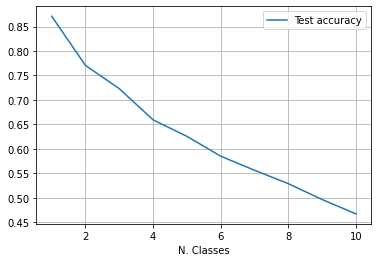

In [10]:
import torch
import numpy as np
import sys
from torch.utils import *
import argparse
from torch.backends import cudnn
cudnn.benchmark


parser = argparse.ArgumentParser(description='Incremental Learning BIC')
parser.add_argument('--batch_size', default = 128, type = int)
parser.add_argument('--epoch', default = 70, type = int)
parser.add_argument('--lr', default = 0.1, type = int)
parser.add_argument('--max_size', default = 2000, type = int)
parser.add_argument('--total_cls', default = 100, type = int)

args = parser.parse_args(args=[])

trainer = Trainer(args.total_cls)
trainer.train(args.batch_size, args.epoch, args.lr, args.max_size)